In [2]:
#importing neeeded libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [3]:
#importing and understanding the dataset
df = pd.read_csv('IoTpond7.csv')
df.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_16868\1034627056.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IoTpond7.csv')


,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-06-18 13:02:10 CET,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
1,2021-06-18 13:02:30 CET,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2,2021-06-18 13:02:50 CET,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
3,2021-06-18 13:03:10 CET,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
4,2021-06-18 13:03:40 CET,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


In [4]:
#checking for missing values
df.isnull().sum()

created_at                      0
Date                            0
entry_id                        0
temperature(C)                  0
turbidity (NTU)                 0
Dissolved Oxygen (g/ml)         0
PH                              0
ammonia(g/ml)               94388
nitrate(g/ml)                   0
Fish_length(cm)                 0
Fish_weight(g)                  0
Unnamed: 11                279612
Unnamed: 12                279606
Unnamed: 13                279605
dtype: int64

In [5]:
#checking for the data types
df.dtypes

created_at                  object
Date                        object
entry_id                     int64
temperature(C)             float64
turbidity (NTU)              int64
Dissolved Oxygen (g/ml)    float64
PH                         float64
ammonia(g/ml)              float64
nitrate(g/ml)                int64
Fish_length(cm)            float64
Fish_weight(g)             float64
Unnamed: 11                float64
Unnamed: 12                float64
Unnamed: 13                 object
dtype: object

In [6]:
#drop Unnamed: 11 column
df.drop('Unnamed: 11', axis=1, inplace=True)

In [7]:
#drop Unnamed: 12 column
df.drop('Unnamed: 12', axis=1, inplace=True)

In [8]:
#drop Unnamed: 13 column
df.drop('Unnamed: 13', axis=1, inplace=True)

In [9]:
#drop Date column
df.drop('Date', axis=1, inplace=True)

In [10]:
#drop entry_id, turbidity (NTU), nitrate(g/ml) columns
df.drop(['entry_id', 'turbidity (NTU)', 'nitrate(g/ml)'], axis=1, inplace=True)

In [11]:
#removing all null values
df.dropna(inplace=True)

In [12]:
#displaying the dataset
df.head()

,created_at,temperature(C),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),Fish_length(cm),Fish_weight(g)
0,2021-06-18 13:02:10 CET,25.3750,40.048,8.17490,780.03149,6.772857,3.037143
1,2021-06-18 13:02:30 CET,25.3750,40.048,8.13858,0.14989,6.772857,3.037143
2,2021-06-18 13:02:50 CET,25.3125,40.048,8.34740,0.24039,6.772857,3.037143
3,2021-06-18 13:03:10 CET,25.3125,40.048,8.17490,0.31723,6.772857,3.037143
4,2021-06-18 13:03:40 CET,25.3750,40.048,8.14766,1.02537,6.772857,3.037143


<AxesSubplot:>

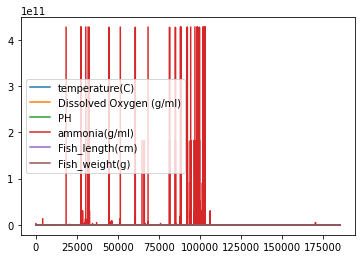

In [13]:
#plotting the dataset
df.plot()

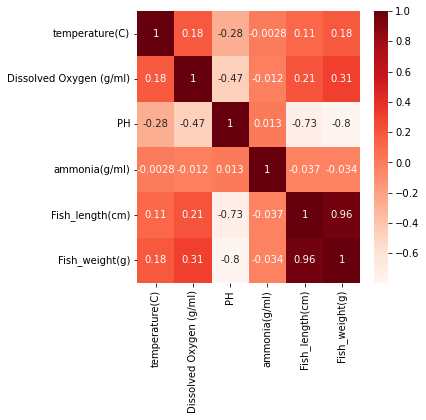

In [14]:
#creating a heatmap to show the correlation between the features
plt.figure(figsize=(5, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

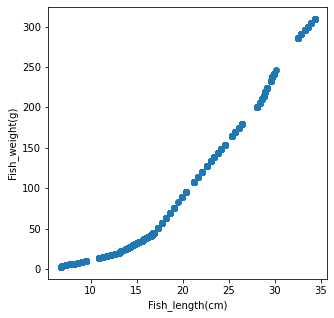

In [15]:
#display graph fish length vs fish weight
plt.figure(figsize=(5, 5))
plt.scatter(df['Fish_length(cm)'], df['Fish_weight(g)'])
plt.xlabel('Fish_length(cm)')
plt.ylabel('Fish_weight(g)')
plt.show()

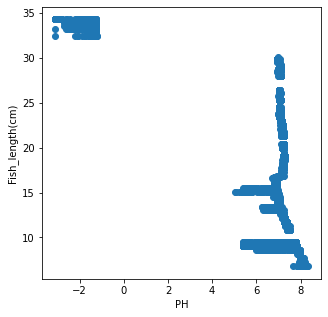

In [16]:
#display grap ph vs Fish_Length(cm)
plt.figure(figsize=(5, 5))
plt.scatter(df['PH'], df['Fish_length(cm)'])
plt.xlabel('PH')
plt.ylabel('Fish_length(cm)')
plt.show()

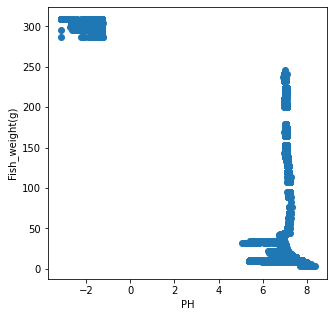

In [17]:
#dispaly graph ph vs fish weight
plt.figure(figsize=(5, 5))
plt.scatter(df['PH'], df['Fish_weight(g)'])
plt.xlabel('PH')
plt.ylabel('Fish_weight(g)')
plt.show()

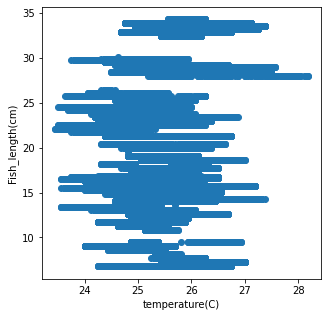

In [18]:
#display graph temperature vs fish length
plt.figure(figsize=(5, 5))
plt.scatter(df['temperature(C)'], df['Fish_length(cm)'])
plt.xlabel('temperature(C)')
plt.ylabel('Fish_length(cm)')
plt.show()

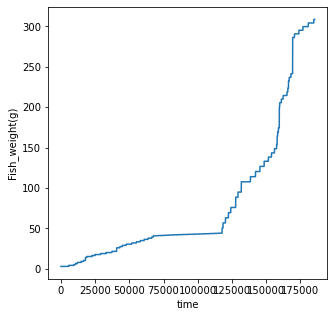

In [19]:
#time series plot with fish weight
plt.figure(figsize=(5, 5))
plt.plot(df['Fish_weight(g)'])
plt.xlabel('time')
plt.ylabel('Fish_weight(g)')
plt.show()

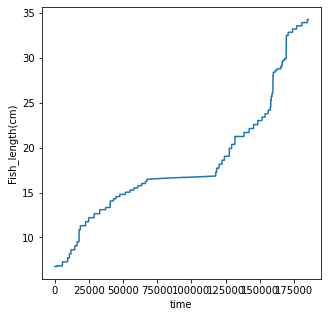

In [20]:
#time series plot with fish length
plt.figure(figsize=(5, 5))
plt.plot(df['Fish_length(cm)'])
plt.xlabel('time')
plt.ylabel('Fish_length(cm)')
plt.show()

In [21]:
#detirmane the max Fish_Length(cm)
df['Fish_length(cm)'].max()

34.3

In [22]:
#detirmane the min Fish_Length(cm)
df['Fish_length(cm)'].min()

6.772857143

In [23]:
#detirmane the max Fish_Weight(g)
df['Fish_weight(g)'].max()

308.7714286

In [24]:
#detirmane the min Fish_Weight(g)
df['Fish_weight(g)'].min()

3.037142857

In [25]:
#display data types
df.dtypes

created_at                  object
temperature(C)             float64
Dissolved Oxygen (g/ml)    float64
PH                         float64
ammonia(g/ml)              float64
Fish_length(cm)            float64
Fish_weight(g)             float64
dtype: object

In [26]:
#drop created_at column
df.drop('created_at', axis=1, inplace=True)

In [27]:
#display data types
df.dtypes

temperature(C)             float64
Dissolved Oxygen (g/ml)    float64
PH                         float64
ammonia(g/ml)              float64
Fish_length(cm)            float64
Fish_weight(g)             float64
dtype: object

In [28]:
#drop all NaN values, infinte values and values to big for float32
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df[df['Fish_length(cm)'] < 100]
df = df[df['Fish_weight(g)'] < 10000]
df = df[df['PH'] < 14]
df = df[df['temperature(C)'] < 50]

In [29]:
#building the model using random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
#splitting the dataset into train and test
X = df.drop(['Fish_length(cm)', 'Fish_weight(g)'], axis=1)
y = df['Fish_length(cm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#fitting the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
#predicting the model
y_pred = model.predict(X_test)

In [33]:
#displaying the results
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Mean squared error: 0.19
Coefficient of determination: 1.00


In [34]:
#show model accuracy
print('Accuracy of random forest regressor on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of random forest regressor on test set: 1.00


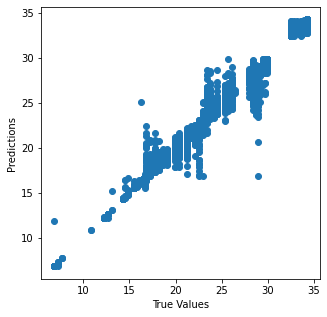

In [35]:
#plotting the results
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [36]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'cm.')

Mean Absolute Error: 0.14 cm.


In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.42 %.


In [38]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
32008,12.652857,12.652857
104876,16.767143,16.767143
155859,23.788571,23.888486
164011,28.780000,28.738200
87568,16.645714,15.528571
...,...,...
106687,16.767143,16.782686
138921,21.695714,21.647157
32296,12.652857,12.652857
155367,23.788571,24.222814


c:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


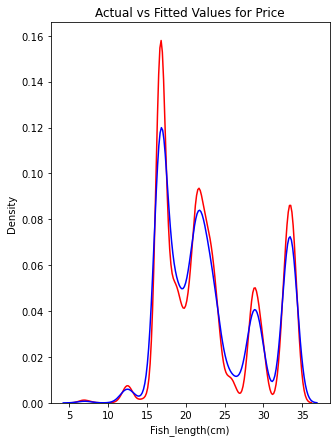

In [39]:
#plot the difference between the actual and predicted values
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

In [43]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
data = [25,41,8.2, 4]
newPred = model.predict(sc.fit_transform([data]))

c:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
newPred

array([33.1048])